# WISE2MBH Tutorial: AllWISE

This sample contain WISE data from the AllWISE catalog, no distances are provided, but redshifts come from the EHTER sample. At the moment of calculating W1 absolute magnitude, the distance modulus is calculated from the luminous distance, calculated by the redshift.

In [4]:
import wise2mbh as wm
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import random
no_data = 9876543

In [5]:
allwise = Table.read('../samples/AllWISE_sample.fits')
allwise

ONAME,RA,DEC,Z,T,NED_TYPE,AllWISE,RAJ2000,DEJ2000,eeMaj,eeMin,eePA,W1mag,W2mag,W3mag,W4mag,Jmag,Hmag,Kmag,e_W1mag,e_W2mag,e_W3mag,e_W4mag,e_Jmag,e_Hmag,e_Kmag,ID,ccf,ex,var,qph,pmRA,e_pmRA,pmDE,e_pmDE,d2M,angDist
bytes107,float64,float64,float64,float64,bytes7,bytes19,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,bytes4,bytes1,bytes4,bytes4,int32,int32,int32,int32,float32,float64
WISEAJ112428.14-363548.5,171.1172539,-36.5968225,0.2,9876543.0,Unknown,J112428.14-363548.5,171.1172539,-36.5968225,0.0427,0.0415,130.3,13.449,12.486,9.394,6.977,15.185,14.474,14.293,0.025,0.024,0.033,0.084,0.056,0.061,0.075,1716036401351015875,0000,0,1122,AAAA,160,54,42,55,2.073,1e-06
WISEAJ144229.68-435343.2,220.6236974,-43.8953408,0.3,9876543.0,Unknown,J144229.68-435343.2,220.6236974,-43.8953408,0.1285,0.1177,11.9,15.975,14.663,10.911,7.801,--,--,--,0.055,0.06,0.118,0.195,--,--,--,2205044001351034712,0000,0,011n,AABB,412,466,-34,505,--,1e-06
WISEAJ163728.75+290335.9,249.3698107,29.0599733,0.2,9876543.0,Unknown,J163728.75+290335.9,249.3698107,29.0599733,0.0692,0.0643,4.9,15.637,13.775,9.703,7.347,--,--,--,0.04,0.034,0.038,0.124,--,--,--,2485128701351042160,0000,0,0011,AAAB,-116,295,-250,278,--,2e-06
WISEAJ184321.55-621724.8,280.8398056,-62.2902233,0.2,9876543.0,Unknown,J184321.55-621724.8,280.8398056,-62.2902233,0.0722,0.0689,38.8,14.624,13.762,11.04,8.519,--,--,--,0.036,0.035,0.106,--,--,--,--,2810062101351018362,0000,0,nnnn,AAAU,--,--,--,--,--,5e-06
WISEAJ183203.33+633041.5,278.0139066,63.5115391,0.3,9876543.0,Unknown,J183203.33+633041.5,278.0139066,63.5115391,0.0662,0.0627,129.3,15.811,14.794,11.508,8.357,--,--,--,0.032,0.035,0.086,0.118,--,--,--,2774163601351028837,0000,0,11nn,AAAB,155,233,-229,248,--,7e-06
WISEAJ000517.26-341452.8,1.321926,-34.2480098,0.3,9876543.0,Unknown,J000517.26-341452.8,1.321926,-34.2480098,0.0752,0.0713,141.6,15.1,14.143,10.839,7.887,--,--,--,0.035,0.04,0.114,0.189,--,--,--,18034901351061482,0000,0,110n,AABB,289,256,-282,261,--,7e-06
WISEAJ041514.13-810745.9,63.8088863,-81.1294387,0.2,9876543.0,Unknown,J041514.13-810745.9,63.8088863,-81.1294387,0.0457,0.0449,162.3,14.499,13.543,10.429,7.558,--,--,--,0.025,0.026,0.048,0.099,--,--,--,681081801351062155,0000,0,110n,AAAA,260,66,92,69,--,8e-06
WISEAJ150206.92+781622.6,225.5288639,78.2729584,0.3,9876543.0,Unknown,J150206.92+781622.6,225.5288639,78.2729584,0.0886,0.0831,95.1,15.959,15.085,12.15,9.497,--,--,--,0.037,0.05,0.202,0.512,--,--,--,2232178701351000385,0000,0,11nn,AABC,-761,305,100,285,--,9e-06
WISEAJ050357.41-282633.0,75.989223,-28.4425115,0.2,9876543.0,Unknown,J050357.41-282633.0,75.989223,-28.4425115,0.1182,0.0847,153.4,15.102,14.292,11.284,8.529,--,--,--,0.045,0.045,0.125,0.332,--,--,--,754028801351050034,0000,0,nnnn,AABB,--,--,--,--,--,1.1e-05


Clening process of the sample from AllWISE

In [6]:
size_before_depure = len(allwise)
print(f'Size before depure: {size_before_depure}')

allowed_z = allwise[allwise['Z']!=0]                                                            #Masking of null redshifts
qph_list = allwise['qph'].tolist()                                                              #Extract quality flags
null_phot = ['X', 'Z']                                                                          #Null and uplim values in W bands
not_null_quality = [not any(letter in qph[:-1] for letter in null_phot) for qph in qph_list]    #Test quality flags

allwise = allowed_z[not_null_quality].copy()                                                    #Keep non-null values in quality

size_after_depure = len(allwise)
print(f'Size after depure: {size_after_depure}')

Size before depure: 77712


Size after depure: 77687


Detections with 'U' flag in qph do not contain errors on the WISE bands, so better to set them to a single value, in this case we'll set them to 0

In [7]:
allwise['e_W1mag'] = allwise['e_W1mag'].filled(0)                 #Replace null errors in WISE bands
allwise['e_W2mag'] = allwise['e_W2mag'].filled(0)
allwise['e_W3mag'] = allwise['e_W3mag'].filled(0)

Since this algorithm have a Monte Carlo implementation for error propagation, we recommend to take slices for big sample (rows>200), so for this tutorial, we'll use a random slice from the AllWISE sample.

In [8]:
random_indices = random.sample(range(len(allwise)), 1000)
new_allwise = allwise[random_indices]
new_allwise

ONAME,RA,DEC,Z,T,NED_TYPE,AllWISE,RAJ2000,DEJ2000,eeMaj,eeMin,eePA,W1mag,W2mag,W3mag,W4mag,Jmag,Hmag,Kmag,e_W1mag,e_W2mag,e_W3mag,e_W4mag,e_Jmag,e_Hmag,e_Kmag,ID,ccf,ex,var,qph,pmRA,e_pmRA,pmDE,e_pmDE,d2M,angDist
bytes107,float64,float64,float64,float64,bytes7,bytes19,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,bytes4,bytes1,bytes4,bytes4,int32,int32,int32,int32,float32,float64
SDSSJ093215.51+101250.6,143.0646405,10.2140698,0.20331067,9876543.0,Unknown,J093215.51+101250.6,143.0646387,10.2140807,0.0683,0.066,165.3,14.425,14.065,11.846,8.281,16.427,15.673,14.885,0.03,0.042,0.275,--,0.161,0.174,0.14,1430110601351018115,0000,0,11nn,AABU,-180,162,-172,172,0.176,0.039705
SDSS3087294031638587392,206.20752,16.4058,0.17861924,-5.0,Galaxy,J134449.80+162420.8,206.2075163,16.4058028,0.0519,0.0506,2.9,13.705,13.425,12.489,8.903,15.756,14.843,14.472,0.026,0.03,0.386,--,0.081,0.081,0.091,2059116601351020742,0000,0,00nn,AACU,-91,71,103,76,0.071,0.01621
SDSSJ012106.59+124434.9,20.27748,12.7430536,0.49656665,9876543.0,Unknown,J012106.59+124435.0,20.2774827,12.7430661,0.1179,0.1115,152.6,15.52,15.48,11.959,9.048,--,--,--,0.043,0.107,0.0,--,--,--,--,200112101351050465,0000,0,0nnn,AAUU,391,338,-136,350,--,0.045926
SDSSJ131545.36+595248.0,198.9390165,59.8800001,0.49351,9876543.0,Unknown,J131545.36+595247.9,198.9390073,59.8799894,0.0989,0.0929,22.5,15.52,15.618,12.415,9.224,--,--,--,0.036,0.097,0.0,--,--,--,--,1980160501351000158,0000,0,0nnn,AAUU,506,281,156,295,--,0.042013
SDSSJ115323.71+162102.8,178.3488165,16.3507913,0.28440365,9876543.0,Unknown,J115323.71+162102.8,178.3488044,16.3507928,0.0785,0.0742,6.5,14.777,14.519,12.589,9.152,16.708,16.26,15.389,0.033,0.055,0.0,--,0.129,0.178,0.122,1776116601351024506,0000,0,00nn,AAUU,-178,188,130,205,0.278,0.042313
WISEAJ230830.78-101521.8,347.1282888231,-10.2560719241,0.30194232,9876543.0,Unknown,J230830.78-101521.8,347.1282909,-10.256075,0.0715,0.0682,125.3,14.253,14.154,12.135,8.241,16.595,15.555,15.109,0.03,0.052,0.0,--,0.112,0.134,0.149,3476010701351040131,0000,0,nnnn,AAUU,315,176,-567,180,0.055,0.013352
SDSSJ231520.12+185234.1,348.833856,18.876146,0.36197,9876543.0,Unknown,J231520.12+185234.1,348.8338591,18.8761554,0.0859,0.0808,144.1,14.969,14.741,12.153,8.941,--,--,--,0.034,0.069,0.0,--,--,--,--,3488118101351053909,0000,0,00nn,AAUU,69,236,-45,246,--,0.035354
WISEAJ202218.76-525829.2,305.5781992,-52.974803,0.3,9876543.0,Unknown,J202218.76-525829.2,305.5781806,-52.9748004,0.0394,0.0379,86.4,12.951,12.064,9.129,6.179,15.928,15.273,14.28,0.024,0.022,0.035,0.05,0.107,0.124,0.083,3057053101351031803,0000,0,1100,AAAA,75,49,-148,50,0.061,0.041489
J0857+8603,134.4231478691101,86.06236279169718,0.2,9876543.0,RS,J085741.57+860344.5,134.4232402,86.0623679,0.0543,0.0525,1.9,14.689,13.838,11.439,8.776,--,--,--,0.028,0.03,0.134,--,--,--,--,1399186301351014480,0000,0,21nn,AABU,-75,108,-147,116,--,0.029345


First, store the observed colors and then define the Monte Carlo arrays for W1, W2 and W3, with the same colors but now for Monte Carlo arrays

In [9]:
new_allwise['W1-W2_obs'] = new_allwise['W1mag'] - new_allwise['W2mag']
new_allwise['W2-W3_obs'] = new_allwise['W2mag'] - new_allwise['W3mag']

In [10]:
w1 = wm.array_montecarlo(new_allwise['W1mag'],new_allwise['e_W1mag'])
w2 = wm.array_montecarlo(new_allwise['W2mag'],new_allwise['e_W2mag'])
w3 = wm.array_montecarlo(new_allwise['W3mag'],new_allwise['e_W3mag'])
z = np.array(new_allwise['Z'])

w1w2_obs = w1-w2
w2w3_obs = w2-w3

# K-corrections for the defined sample

Now that all initial colors are created, one can start by the first masking of the reject zone by deleting all sources with a W2-W3>4.4

In [11]:
first_reject_zone = new_allwise['W2-W3_obs']<=4.4

In [12]:
w1 = w1[first_reject_zone]
w2 = w2[first_reject_zone]
w3 = w3[first_reject_zone]
z = z[first_reject_zone]

w1w2_obs = w1w2_obs[first_reject_zone]
w2w3_obs = w2w3_obs[first_reject_zone]

new_allwise = new_allwise[first_reject_zone]

It is necessary to create new arrays to store K-corrected W1abs and the K-correction factor of W1-W2 and W2-W3

In [13]:
w1w2_kcors = np.zeros(np.shape(w1w2_obs)[0])                                                
w2w3_kcors = np.zeros(np.shape(w2w3_obs)[0])
w1abs = np.zeros(np.shape(w1))

In [14]:
object_condition = (new_allwise['NED_TYPE']=='RadioS') | (new_allwise['NED_TYPE']=='QSO')
color_condition_1 = (new_allwise['W1-W2_obs']>0.8) & (new_allwise['W2-W3_obs']<2.2)
color_condition_2 = (new_allwise['W1-W2_obs']>wm.w1w2_treshold_qso(new_allwise['W2-W3_obs'])) & (new_allwise['W2-W3_obs']>=2.2) & (new_allwise['W2-W3_obs']<=4.4)

suboptimal_cond = (new_allwise['Z']>=0.5) & (new_allwise['Z']<=3) & ~object_condition & ~(color_condition_1 | color_condition_2)
nok_cond = (new_allwise['Z']>3) | object_condition | color_condition_1 | color_condition_2

optimal_sample = new_allwise[(new_allwise['Z']<0.5) & ~object_condition & ~(color_condition_1 | color_condition_2)]
suboptimal_sample = new_allwise[suboptimal_cond]                                                                            #Samples for k-correcion                
nok_sample = new_allwise[nok_cond]

To create the final quality tag, here we store the K-correction tag

In [15]:
new_allwise['K_QUALITY'] = 0

new_allwise['K_QUALITY'] = np.where(suboptimal_cond, 1, new_allwise['K_QUALITY'])
new_allwise['K_QUALITY'] = np.where(nok_cond, 2, new_allwise['K_QUALITY'])

Now we import the look-up tables from Jarrett+2023 to use

In [16]:
e_table = wm.kcorr_table('E')
l_table = wm.kcorr_table('L')
s_table = wm.kcorr_table('S')

In [17]:
e_table

,z,f1,W1-W2,W1-W3,W3-W4,W2-W3
0,0.00050,1.000,-0.000,-0.000,-0.000,-0.000
1,0.00100,1.000,0.000,0.001,0.000,0.001
2,0.00150,0.998,0.002,0.001,0.001,-0.001
3,0.00200,0.995,0.000,0.000,0.001,0.000
4,0.00250,0.995,0.005,0.002,0.002,-0.003
...,...,...,...,...,...,...
827,2.87603,0.043,0.930,1.733,-0.180,0.803
828,2.90479,0.043,0.941,1.758,-0.180,0.817
829,2.93384,0.043,0.952,1.783,-0.181,0.831
830,2.96318,0.043,0.963,1.808,-0.182,0.845


In [18]:
identifier = np.random.choice(np.arange(10), size=3, replace=False)
for idn, sample in zip(identifier,[optimal_sample, suboptimal_sample, nok_sample]):
    if len(sample)!=0:
        if idn!=identifier[2]:                                                                      #Color k-correction for sample with z<0.5
            object_condition = (sample['NED_TYPE']=='RadioS') | (sample['NED_TYPE']=='QSO')

            e_index = np.where((sample['T']<=-3) & ~object_condition)[0]
            l_index = np.where((sample['T']>-3) & (sample['T']<=0) & ~object_condition)[0]          #Divide samples in Elliptical, Lenticular and Spiral by T value
            s_index = np.where((sample['T']>0) & (sample['T']!=no_data) & ~object_condition)[0]

            no_type_index = np.where((sample['T']==no_data) & ~object_condition)[0]                 #Sample without T values
            w1w2_no_type = sample[no_type_index]['W1-W2_obs']                                      
            w2w3_no_type = sample[no_type_index]['W2-W3_obs']  
            z_no_type = sample[no_type_index]['Z']                                                    

            e_w1_kcorrected = wm.w1_k_corrected(lookup_table=e_table,w1=w1[e_index],z=z[e_index])
            l_w1_kcorrected = wm.w1_k_corrected(lookup_table=l_table,w1=w1[l_index],z=z[l_index])   #W1 k-corrected 
            s_w1_kcorrected = wm.w1_k_corrected(lookup_table=s_table,w1=w1[s_index],z=z[s_index])

            e_w2w3_kcor = wm.get_correction_factor(lookup_table=e_table, redshift=sample[e_index]['Z'], correction_factor='W2-W3')
            l_w2w3_kcor = wm.get_correction_factor(lookup_table=l_table, redshift=sample[l_index]['Z'], correction_factor='W2-W3')     #W2-W3 k-correction factor
            s_w2w3_kcor = wm.get_correction_factor(lookup_table=s_table, redshift=sample[s_index]['Z'], correction_factor='W2-W3')

            e_w1w2_kcor = wm.get_correction_factor(lookup_table=e_table, redshift=sample[e_index]['Z'], correction_factor='W1-W2')
            l_w1w2_kcor = wm.get_correction_factor(lookup_table=l_table, redshift=sample[l_index]['Z'], correction_factor='W1-W2')     #W1-W2 k-correction factor
            s_w1w2_kcor = wm.get_correction_factor(lookup_table=s_table, redshift=sample[s_index]['Z'], correction_factor='W1-W2')

            #Both k-correction factors for no type sample, using division by observed W2-W3 color
            factor_w2 = 171.787
            factor_w3 = 31.674

            w2w3_limit = -2.5*(np.log10(factor_w3/factor_w2) + 0.1)                             #Last value is the flux limit from Mateos et al. (2012)

            no_type_w1w2_kcor = [
                wm.get_correction_factor(lookup_table=e_table, redshift=z, correction_factor='W1-W2') if (color_x<=w2w3_limit)
                else wm.get_correction_factor(lookup_table=s_table, redshift=z, correction_factor='W1-W2') if (color_x>w2w3_limit) else 0
                for color_x,color_y,z in zip(w2w3_no_type,w1w2_no_type, z_no_type)
                ]
            no_type_w2w3_kcor = [
                wm.get_correction_factor(lookup_table=e_table, redshift=z, correction_factor='W2-W3') if (color_x<=w2w3_limit)
                else wm.get_correction_factor(lookup_table=s_table, redshift=z, correction_factor='W2-W3') if (color_x>w2w3_limit)  else 0
                for color_x,color_y,z in zip(w2w3_no_type,w1w2_no_type, z_no_type)
                ]

            no_type_w1_kcorrected = [
                wm.w1_k_corrected(lookup_table=e_table,w1=w1[no_type_id],z=np.array([z]))[0] if (color_x<=w2w3_limit)
                else wm.w1_k_corrected(lookup_table=s_table,w1=w1[no_type_id],z=np.array([z]))[0] if (color_x>w2w3_limit) else w1[no_type_index]
                for color_x,color_y,z,no_type_id in zip(w2w3_no_type,w1w2_no_type, z_no_type, no_type_index)
                ]   

            e_w1abs_kcorrected = e_w1_kcorrected - wm.distance_modulus_z(sample[e_index]['Z'])[:,None]          #W1 k-correction for e_sources
            l_w1abs_kcorrected = l_w1_kcorrected - wm.distance_modulus_z(sample[l_index]['Z'])[:,None]          #W1 k-correction for l_sources
            s_w1abs_kcorrected = s_w1_kcorrected - wm.distance_modulus_z(sample[s_index]['Z'])[:,None]          #W1 k-correction for s_sources
            no_type_w1abs_kcorrected = no_type_w1_kcorrected - wm.distance_modulus_z(z_no_type)[:,None]   #W1 k-correction for no_type_sources

            if np.shape(no_type_w1abs_kcorrected)==(0,0):
                no_type_w1abs_kcorrected = no_type_w1abs_kcorrected.reshape(0,1000)

            w1w2_kcors[e_index] = e_w1w2_kcor
            w1w2_kcors[l_index] = l_w1w2_kcor                   #W1-W2 k-correctrion factors filled
            w1w2_kcors[s_index] = s_w1w2_kcor
            w1w2_kcors[no_type_index] = no_type_w1w2_kcor

            w2w3_kcors[e_index] = e_w2w3_kcor
            w2w3_kcors[l_index] = l_w2w3_kcor                   #W2-W3 k-correctrion factors filled
            w2w3_kcors[s_index] = s_w2w3_kcor
            w2w3_kcors[no_type_index] = no_type_w2w3_kcor

            w1abs[e_index] = e_w1abs_kcorrected
            w1abs[l_index] = l_w1abs_kcorrected                 #W1abs k-corrected filled
            w1abs[s_index] = s_w1abs_kcorrected
            w1abs[no_type_index] = no_type_w1abs_kcorrected
            
        else:
            w1abs_kcorrected = w1[np.where(nok_cond)[0]] - wm.distance_modulus_z(z[np.where(nok_cond)[0]])[:,None]
            w1abs[np.where(nok_cond)[0]] = w1abs_kcorrected

            w1w2_kcors[np.where(nok_cond)[0]] = 0
            w2w3_kcors[np.where(nok_cond)[0]] = 0                                        #For sources with z>3, no k-correction is applied
    else:
        continue

In [19]:
w1w2_kcorrected = w1w2_obs - w1w2_kcors[:,None]                                 #Colors for complete slice are applied
w2w3_kcorrected = w2w3_obs - w2w3_kcors[:,None]

new_allwise['W1-W2_kcor'] = np.median(w1w2_kcorrected, axis=1)                  #Median value is saved in data frame
new_allwise['W2-W3_kcor'] = np.median(w2w3_kcorrected, axis=1)

w1w2_sat_top = wm.clipping_dist(w1w2_kcorrected, 0.6)                           #W1-W2 is saturated between -0.2 and 0.6 for M/L ratios
w1w2_sat_complete = wm.clipping_dist(w1w2_sat_top, -0.2, greater_than=False)

In [20]:
del w1w2_obs, w2w3_obs, w1w2_kcorrected, w1w2_sat_top

# Use scaling relations and wm.param_montecarlo()

Now that all necesary quantities for Stellar mass estimation are ready, one can decide if to use a simple definition (like the one provided in the package) or use the built-in function to vary the parameters. 

For this, we used the function from Cluver+2014, which is defined as follows:

In [21]:
def wise_to_logsm(w1abs, w1w2, resolved=False):
    w1_abs_sun = 3.26                   #from Willmer (2018) https://iopscience.iop.org/article/10.3847/1538-4365/aabfdf

    log_sm_lw1 = -1.96*w1w2 - 0.03
    if resolved:
        log_sm_lw1 = -2.54*w1w2 - 0.17
    log_lw1 = -0.4*(w1abs-w1_abs_sun)   #from Cluver et al. (2014) https://iopscience.iop.org/article/10.1088/0004-637X/782/2/90
    log_sm = log_sm_lw1 + log_lw1
    
    return log_sm

This same exact function is part of WISE2MBH package and here is the intended behavior of it:

In [22]:
log_sm = wm.wise_to_logsm(w1abs, w1w2_sat_complete)

11.036545790738726 11.137075987817761 11.244195035138599


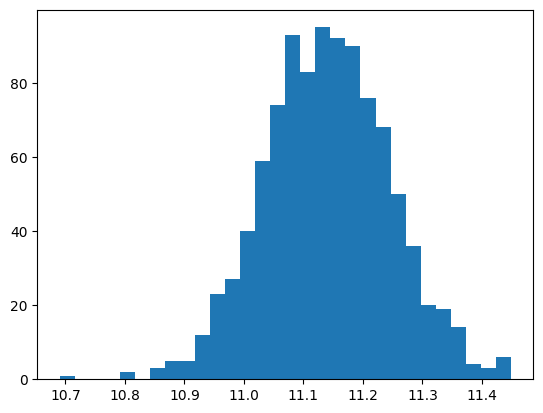

In [23]:
plt.hist(log_sm[0],bins=30)

nominal = np.median(log_sm[0])
sigma_down = np.percentile(log_sm[0],16)
sigma_top = np.percentile(log_sm[0],84)

print(sigma_down, nominal, sigma_top)

But with the use of wm.param_montecarlo() function you can include uncertainties for all parameters, like in this example:

In [24]:
def wise_to_logsm(w1abs, w1w2, resolved=False):
    w1_abs_sun = 3.26                   #from Willmer (2018) https://iopscience.iop.org/article/10.3847/1538-4365/aabfdf

    log_sm_lw1 = wm.param_montecarlo(-1.96,0.8)*w1w2 - wm.param_montecarlo(0.03,0.03) #Fake uncertainties applied
    if resolved:
        log_sm_lw1 = -2.54*w1w2 - 0.17
    log_lw1 = -0.4*(w1abs-w1_abs_sun)   #from Cluver et al. (2014) https://iopscience.iop.org/article/10.1088/0004-637X/782/2/90
    log_sm = log_sm_lw1 + log_lw1
    
    return log_sm

In [25]:
log_sm_uncertain = wise_to_logsm(w1abs, w1w2_sat_complete)

10.81734822545425 11.150502104831642 11.445321140572212


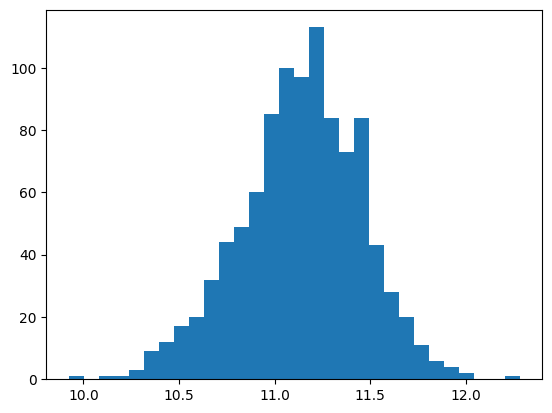

In [26]:
plt.hist(log_sm_uncertain[0],bins=30)

nominal = np.median(log_sm_uncertain[0])
sigma_down = np.percentile(log_sm_uncertain[0],16)
sigma_top = np.percentile(log_sm_uncertain[0],84)

print(sigma_down, nominal, sigma_top)

For every single scaling relation used in this work, one can easily modify the original version to include uncertainties in all parameters by the use of wm.param_montecarlo()

In [27]:
new_allwise['logSM'] = np.median(log_sm, axis=1)

In [28]:
low_sm = 6.5            
high_sm = 13                    #Limit values in log stellar and masking
                                                                                
log_sm_mask = (new_allwise['logSM']>=low_sm) & (new_allwise['logSM']<=high_sm)

In [29]:
log_sm = np.delete(log_sm, np.where(~log_sm_mask)[0], axis=0)       #logsm and w2w3 gaussian arrays are masked by the limits
w2w3_kcorrected = np.delete(w2w3_kcorrected, np.where(~log_sm_mask)[0], axis=0)
new_allwise = new_allwise[log_sm_mask]

# Estimate and Upper limit zone for classification of objects

First we will start by selecting the IDs of objects at Estimate and Upper limit zones.

In [30]:
object_condition = (new_allwise['NED_TYPE']=='RadioS') | (new_allwise['NED_TYPE']=='QSO')
color_condition_1 = (new_allwise['W1-W2_kcor']>0.8) & (new_allwise['W2-W3_kcor']<2.2)
color_condition_2 = (new_allwise['W1-W2_kcor']>wm.w1w2_treshold_qso(new_allwise['W2-W3_kcor'])) & (new_allwise['W2-W3_kcor']>=2.2) & (new_allwise['W2-W3_kcor']<=4.4)

With that conditions, we define the regions (by boolean arrays)

In [31]:
new_allwise_estim_cond = ~(object_condition | color_condition_1 | color_condition_2)
new_allwise_uplim_cond = object_condition | color_condition_1 | color_condition_2

Now we can save the Bulge-to-Total (B/T) value for the upper limits, since this will not change, independent of posterior calculations

In [32]:
new_allwise['BT'] = no_data
new_allwise['BT'] = np.where(new_allwise_uplim_cond,1, new_allwise['BT'])

# Morph. Type (T-Type) estimation using W2-W3 color

For objects previously classified as real estimates, a T-Type is needed to calculate the B/T, and that value sis not present or not usable in some cases, so we need to estimate it.

In [33]:
cond_change_t = (new_allwise_estim_cond) & ((new_allwise['T']==no_data) | (new_allwise['T']>8) | (new_allwise['T']<-5)) #Condition to change morphological value
w2w3_to_use = w2w3_kcorrected[np.where(cond_change_t)[0]]                                 #w2w3 is masked once again, now for noQSO that require a new T
new_t_value = wm.w2w3_to_morph(w2w3_to_use) 

2.826164095326352 3.6497853980717263 5.40008216547015


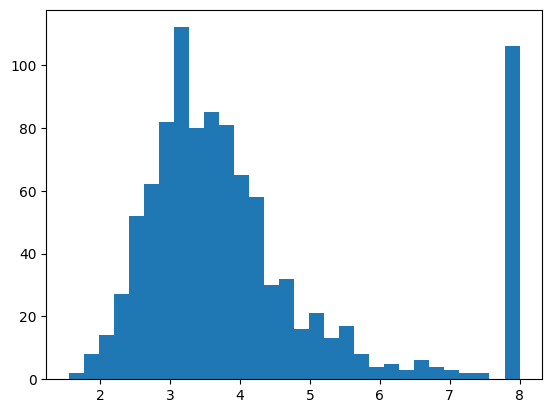

In [34]:
plt.hist(new_t_value[0],bins=30)

nominal = np.median(new_t_value[0])
sigma_down = np.percentile(new_t_value[0],16)
sigma_top = np.percentile(new_t_value[0],84)

print(sigma_down, nominal, sigma_top)

In this case, wm.w2w3_to_morph() is defined with single parameters and no montecarlo parameters, but the W2-W3 kcorrected colors are stored as a montecarlo array, so errors are present. One can once again use the wm.param_montecarlo() function to re-define the function to consider fit errors like this:

In [35]:
def w2w3_to_morph(color):
    if type(color) is list:
        color = np.array(color)

    params = [0.745953333333333, 2.7095333333333333]
    params_mc = [1.20656567, 1.36157769]
    color_desp_norm = (color-params[0])/params[1]
    t_value = wm.param_montecarlo(params_mc[0],0.01)*logit(color_desp_norm)+wm.param_montecarlo(params_mc[1],0.02)

    t_value = np.where((t_value<-5) | (color_desp_norm<=0), -5, t_value)
    t_value = np.where((t_value>8) | (color_desp_norm>=1), 8, t_value)

    return t_value

In [36]:
new_t_value_uncertain = wm.w2w3_to_morph(w2w3_to_use) 

2.826164095326352 3.6497853980717263 5.40008216547015


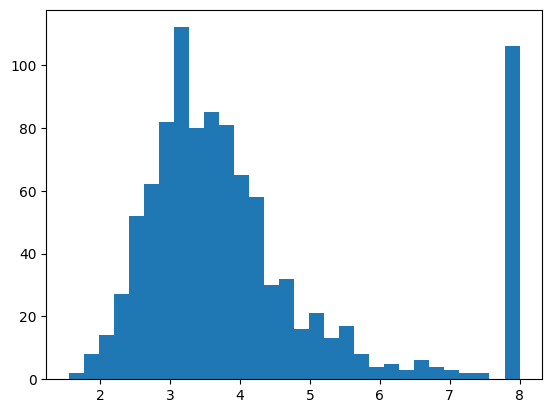

In [37]:
plt.hist(new_t_value_uncertain[0],bins=30)

nominal = np.median(new_t_value_uncertain[0])
sigma_down = np.percentile(new_t_value_uncertain[0],16)
sigma_top = np.percentile(new_t_value_uncertain[0],84)

print(sigma_down, nominal, sigma_top)

In this case, fit errors are so low that the changes are negligible.

Next step is to replace T-Types to use in the original T-Types provided, for that we must generate a montecarlo array with all provided values and sigma zero, and then replace in that array our estimated T-Types

In [38]:
t_value_dist = wm.array_montecarlo(new_allwise['T'], np.zeros(len(new_allwise['T'])))  #Gaussians of every T value
t_value_dist[cond_change_t] = new_t_value

In [39]:
new_allwise['T_USED'] = -99                                                                                                  #T values selected are changed
new_allwise['T_USED'] = np.where(new_allwise_estim_cond, np.median(t_value_dist, axis=1), new_allwise['T_USED'])

new_allwise['T_QUALITY'] = 0
new_allwise['T_QUALITY'] = np.where(cond_change_t, 1, new_allwise['T_QUALITY'])
new_allwise['T_QUALITY'] = np.where(new_allwise_uplim_cond, 2, new_allwise['T_QUALITY'])

# BT from T-Type using exponential relation

Once again, the formula provided here, wm.morph_to_bulge_ratio() use single parameters, but it can be redefined to use wm.param_montecarlo() to include fit errors

In [40]:
bulge_frac = wm.morph_to_bulge_ratio(t_value_dist)                                               #Bulge fractions are calculated for noQSO using the T value

0.17473712808470263 0.22559199645335973 0.2563285623994096


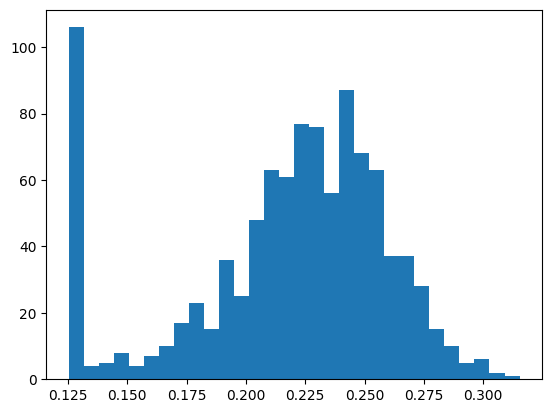

In [41]:
plt.hist(bulge_frac[0],bins=30)

nominal = np.median(bulge_frac[0])
sigma_down = np.percentile(bulge_frac[0],16)
sigma_top = np.percentile(bulge_frac[0],84)

print(sigma_down, nominal, sigma_top)

In [51]:
def morph_to_bulge_ratio(t_value):
    values = [0.35777546, 7.72843881, 0.09658478, 0.05159308]

    values_mc = [wm.param_montecarlo(val,0.01) for val in values]

    b_ratio =  values_mc[3] + values_mc[0]*(values_mc[1]**(-values_mc[2]*t_value))
    b_ratio[b_ratio>1] = 1
    b_ratio[b_ratio<0.01] = 0.01    #we have to include this to not consider negative or null bulge ratios

    return b_ratio

In [52]:
bulge_frac_uncertain = morph_to_bulge_ratio(t_value_dist)                                               #Bulge fractions are calculated for noQSO using the T value

0.1733780685450935 0.22831438556877895 0.26059349947428606


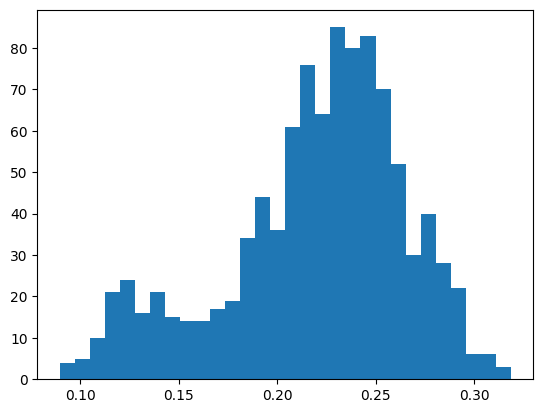

In [53]:
plt.hist(bulge_frac_uncertain[0],bins=30)

nominal = np.median(bulge_frac_uncertain[0])
sigma_down = np.percentile(bulge_frac_uncertain[0],16)
sigma_top = np.percentile(bulge_frac_uncertain[0],84)

print(sigma_down, nominal, sigma_top)

In this specific case, the inclusion of fit errors can generate smoother distributions or completely ruin the estimted BT

In [56]:
new_allwise['BT'] = np.where(new_allwise_estim_cond, np.median(bulge_frac, axis=1), new_allwise['BT'])

Now we need to create a montecarlo array full of ones with zero errors and replace the calculated BTs on it, to consider both Estimates and Upper Limits for final calculations

In [63]:
bf_all = wm.array_montecarlo(np.ones(len(new_allwise)), np.zeros(len(new_allwise)))    #Bulge ratios are overwritten and its median is saved
bf_all[new_allwise_estim_cond] = bulge_frac[new_allwise_estim_cond]

With the BT calculated for every source, now the Bulge Mass can be calculated

In [68]:
log_bm = np.log10(bf_all) + log_sm

Now with the Bulge Mass calculated, the relation from Schutte+2019 can be used. In this case, since that relation include intrinsic scatter, we do not provide a formula with single parameters, since the only right way to use that relation is with montercarlo parameters as follow:

In [72]:
def bulge_to_mbh(log_bm): 
    param1 = wm.param_montecarlo(1.24,0.08)
    param2 = wm.param_montecarlo(8.8,0.09)
    sct = wm.param_montecarlo(0,0.68)

    log_mbh = param1*(log_bm - 11) + param2 + sct
    return log_mbh

In [73]:
log_mbh = bulge_to_mbh(log_bm)

At this stage, this is a first MBH estimation that needs to be compensated using the compensation factor.

In [74]:
comp_mbh = wm.comp_mbh(log_mbh)

7.819231630075738 8.435146964923039 9.04923738923678


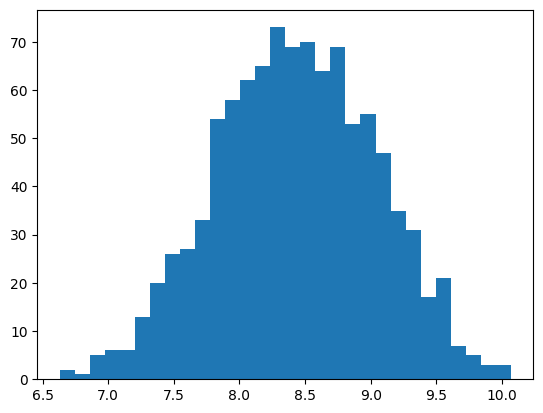

In [75]:
plt.hist(comp_mbh[0],bins=30)

nominal = np.median(comp_mbh[0])
sigma_down = np.percentile(comp_mbh[0],16)
sigma_top = np.percentile(comp_mbh[0],84)

print(sigma_down, nominal, sigma_top)

Now all values of compensated MBHs are stored in the new_allwise table

In [76]:
new_allwise['logMBH'] = np.median(comp_mbh, axis=1)          #16, 50 and 84 percentile values saved for final MBH
new_allwise['low_logMBH'], new_allwise['high_logMBH'] = np.percentile(comp_mbh, [16,84], axis=1)[0], np.percentile(comp_mbh, [16,84], axis=1)[-1]

Finally, we store all flags and create the final 7-digit quality flag

In [78]:
new_allwise['MBHWISEUPLIM'] = 0
new_allwise['MBHWISEUPLIM'] = np.where(new_allwise_uplim_cond, 1, new_allwise['MBHWISEUPLIM'])

In [86]:
phot_info = [x[:-1] for x in new_allwise['qph']]
ex_info = new_allwise['ex']                             #Photometric quality, extention flag and uplim are combined in one string
mbh_info = new_allwise['MBHWISEUPLIM'].astype(str)
k_quality = new_allwise['K_QUALITY'].astype(str)
t_quality = new_allwise['T_QUALITY'].astype(str)

quality_flag = []
for i in np.arange(len(phot_info)):
    str_info = phot_info[i] + ex_info[i] + mbh_info[i] + k_quality[i] + t_quality[i]
    quality_flag.append(str_info)

new_allwise['QF'] = quality_flag 

Now that all columns are created, the final table is ready to depure by MBH outliers and Reject zone

In [89]:
mbh_non_outliers = new_allwise['logMBH']>=5
non_reject_sources = new_allwise['W2-W3_kcor']<=4.4

final_allwise = new_allwise[mbh_non_outliers & non_reject_sources]

In [90]:
final_allwise

ONAME,RA,DEC,Z,T,NED_TYPE,AllWISE,RAJ2000,DEJ2000,eeMaj,eeMin,eePA,W1mag,W2mag,W3mag,W4mag,Jmag,Hmag,Kmag,e_W1mag,e_W2mag,e_W3mag,e_W4mag,e_Jmag,e_Hmag,e_Kmag,ID,ccf,ex,var,qph,pmRA,e_pmRA,pmDE,e_pmDE,d2M,angDist,W1-W2_obs,W2-W3_obs,K_QUALITY,W1-W2_kcor,W2-W3_kcor,logSM,BT,T_USED,T_QUALITY,logMBH,low_logMBH,high_logMBH,MBHWISEUPLIM,QF
bytes107,float64,float64,float64,float64,bytes7,bytes19,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,bytes4,bytes1,bytes4,bytes4,int32,int32,int32,int32,float32,float64,float32,float32,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,str7
SDSSJ093215.51+101250.6,143.0646405,10.2140698,0.20331067,9876543.0,Unknown,J093215.51+101250.6,143.0646387,10.2140807,0.0683,0.066,165.3,14.425,14.065,11.846,8.281,16.427,15.673,14.885,0.03,0.042,0.275,--,0.161,0.174,0.14,1430110601351018115,0000,0,11nn,AABU,-180,162,-172,172,0.176,0.039705,0.3600006,2.2189999,0,0.36309594726079025,3.101862588102523,11.137075987817761,0.22559199645335973,3.6497853980717263,1,8.435146964923039,7.819231630075738,9.04923738923678,0,AAB0001
SDSS3087294031638587392,206.20752,16.4058,0.17861924,-5.0,Galaxy,J134449.80+162420.8,206.2075163,16.4058028,0.0519,0.0506,2.9,13.705,13.425,12.489,8.903,15.756,14.843,14.472,0.026,0.03,0.386,--,0.081,0.081,0.091,2059116601351020742,0000,0,00nn,AACU,-91,71,103,76,0.071,0.01621,0.27999973,0.9359999,0,0.27943584900309665,1.7717802184099132,11.591649986443548,1.0,-5.0,0,9.581358653618647,8.980164044097728,10.196557873494767,0,AAC0000
SDSSJ012106.59+124434.9,20.27748,12.7430536,0.49656665,9876543.0,Unknown,J012106.59+124435.0,20.2774827,12.7430661,0.1179,0.1115,152.6,15.52,15.48,11.959,9.048,--,--,--,0.043,0.107,0.0,--,--,--,--,200112101351050465,0000,0,0nnn,AAUU,391,338,-136,350,--,0.045926,0.040000916,3.521,0,0.046345018402305156,4.37611838767024,11.317930036716774,0.12528185906676714,8.0,1,8.374930965184205,7.747344417088712,9.032106943241274,0,AAU0001
SDSSJ131545.36+595248.0,198.9390165,59.8800001,0.49351,9876543.0,Unknown,J131545.36+595247.9,198.9390073,59.8799894,0.0989,0.0929,22.5,15.52,15.618,12.415,9.224,--,--,--,0.036,0.097,0.0,--,--,--,--,1980160501351000158,0000,0,0nnn,AAUU,506,281,156,295,--,0.042013,-0.09799957,3.203,0,-0.09578563168621462,4.06163536807925,11.600947312045893,0.12528185906676714,8.0,1,8.69725978942462,8.00340032159719,9.317801502526963,0,AAU0001
SDSSJ115323.71+162102.8,178.3488165,16.3507913,0.28440365,9876543.0,Unknown,J115323.71+162102.8,178.3488044,16.3507928,0.0785,0.0742,6.5,14.777,14.519,12.589,9.152,16.708,16.26,15.389,0.033,0.055,0.0,--,0.129,0.178,0.122,1776116601351024506,0000,0,00nn,AAUU,-178,188,130,205,0.278,0.042313,0.25800037,1.9300003,0,0.07867727114092787,2.3655965219674715,11.248672619814354,0.30037709209351426,1.8395332998996348,1,8.682527510090146,8.084235698347372,9.322062908971988,0,AAU0001
WISEAJ230830.78-101521.8,347.1282888231,-10.2560719241,0.30194232,9876543.0,Unknown,J230830.78-101521.8,347.1282909,-10.256075,0.0715,0.0682,125.3,14.253,14.154,12.135,8.241,16.595,15.555,15.109,0.03,0.052,0.0,--,0.112,0.134,0.149,3476010701351040131,0000,0,nnnn,AAUU,315,176,-567,180,0.055,0.013352,0.09899998,2.019,0,-0.07232365894038673,2.4953687645362903,11.791615365592197,0.2885802876403891,2.085494022660647,1,9.238404468686092,8.630993980273466,9.824071869932755,0,AAU0001
SDSSJ231520.12+185234.1,348.833856,18.876146,0.36197,9876543.0,Unknown,J231520.12+185234.1,348.8338591,18.8761554,0.0859,0.0808,144.1,14.969,14.741,12.153,8.941,--,--,--,0.034,0.069,0.0,--,--,--,--,3488118101351053909,0000,0,00nn,AAUU,69,236,-45,246,--,0.035354,0.22799969,2.5880003,0,0.09007580628919837,3.205368128525059,11.295700561671048,0.210176442940394,4.11947763736143,1,8.577678614815811,7.950390420229247,9.208899731926518,0,AAU0001
WISEAJ202218.76-525829.2,305.5781992,-52.974803,0.3,9876543.0,Unknown,J202218.76-525829.2,305.5781806,-52.97480

And this is the final table after the complete process of the WISE2MBH algorithm, using only AllWISE+ETHER data.

In [ ]:
#final_allwise.write('enter_your_route_here.fits')